# Data and Results Report

A function to load energy data from kaggle. The function then just stores the data in a dataframe and returns that dataframe

In [24]:
from load_energy_data import load_energy_data_from_csv

# Load data:
energy_data = load_energy_data_from_csv()

print(energy_data)

      Unnamed: 0  cum_power  Elec_kW  Gas_mxm
0     2011-10-26        0.1     15.1      9.0
1     2011-10-27       10.2      7.4      9.2
2     2011-10-28       20.2      5.8      8.0
3     2011-10-29       29.6      4.9      6.6
4     2011-10-30       34.2     11.7      5.3
...          ...        ...      ...      ...
2943  2019-11-16    32231.0     12.0     15.0
2944  2019-11-17    32235.0     13.0     14.0
2945  2019-11-18    32238.0     13.0     14.0
2946  2019-11-19    32238.0     13.0     15.0
2947  2019-11-20    32244.0      9.0     16.0

[2948 rows x 4 columns]


Plot cumulative power over time

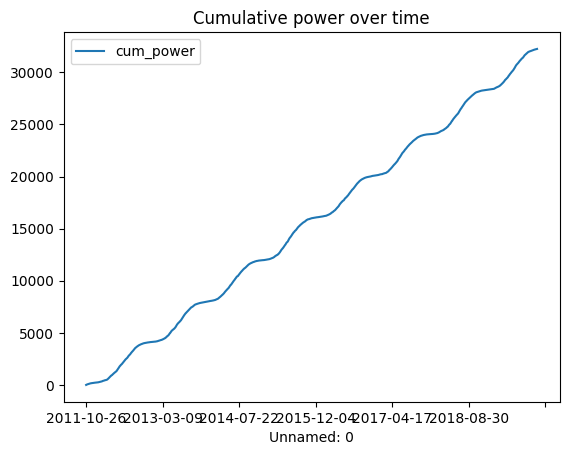

In [26]:
import matplotlib.pyplot as plt
energy_data.plot(x="Unnamed: 0", y="cum_power")
plt.title('Cumulative power over time')
plt.show()

# Loading weather data

In [27]:
from load_weather_data import load_weather_data

# Load data:
weather_data = load_weather_data('data_bucket_raw', 'weather_data.csv')

print(weather_data)

File ./data/temp.csv uploaded to weather_data.csv.
            date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2017-01-01  -1.3  -3.3   0.2   NaN   NaN  206.0  14.0   NaN  1021.0   
1     2017-01-02   2.4   0.3   7.0   NaN   NaN  278.0   8.9   NaN  1024.4   
2     2017-01-03   3.0   0.5   4.6   NaN   NaN  247.0  15.8   NaN  1025.6   
3     2017-01-04   5.7   4.5   7.5   NaN   NaN  301.0  22.5   NaN  1019.5   
4     2017-01-05   2.4  -3.1   5.1   NaN   NaN   15.0   9.8   NaN  1031.6   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
1090  2019-12-27   6.5   5.1   8.0   NaN   NaN   85.0   8.6  24.1  1027.1   
1091  2019-12-28   3.1   0.1   5.7   NaN   NaN  119.0   5.6  14.8  1039.0   
1092  2019-12-29   0.7  -2.2   5.5   NaN   NaN  137.0   5.6  14.8  1037.0   
1093  2019-12-30   5.5   2.7   9.5   NaN   NaN  214.0  11.0  31.5  1031.2   
1094  2019-12-31   3.9   1.7   6.1   NaN   NaN  142.0   7.8  20.4  1033.2   

      tsun  
0      NaN 

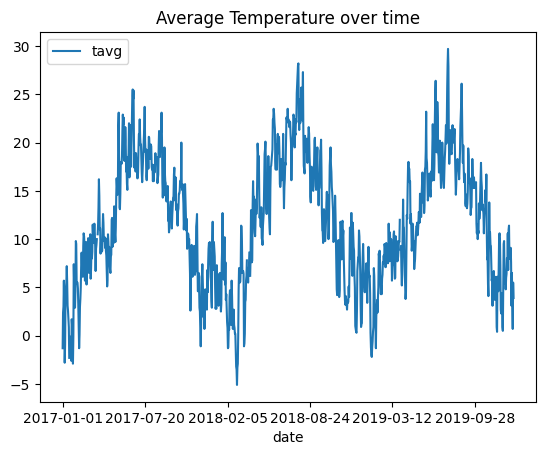

In [28]:
import matplotlib.pyplot as plt
weather_data.plot(x="date", y="tavg")
plt.title('Average Temperature over time')
plt.show()

# Preprocessing energy data

In [30]:
from load_energy_data import load_energy_data_from_csv
from preprocess_data import preprocess_data
from preprocess_data import preprocess_energy

# Load data:
energy_data = load_energy_data_from_csv()

# Preprocessing to join the data frames into one and do some cleaning
data = preprocess_energy('data_bucket_raw', 'energy_data.csv')

print(data)

            date  daily_power
0     2011-10-26          NaN
1     2011-10-27         10.1
2     2011-10-28         10.0
3     2011-10-29          9.4
4     2011-10-30          4.6
...          ...          ...
2943  2019-11-16          2.0
2944  2019-11-17          4.0
2945  2019-11-18          3.0
2946  2019-11-19          0.0
2947  2019-11-20          6.0

[2948 rows x 2 columns]


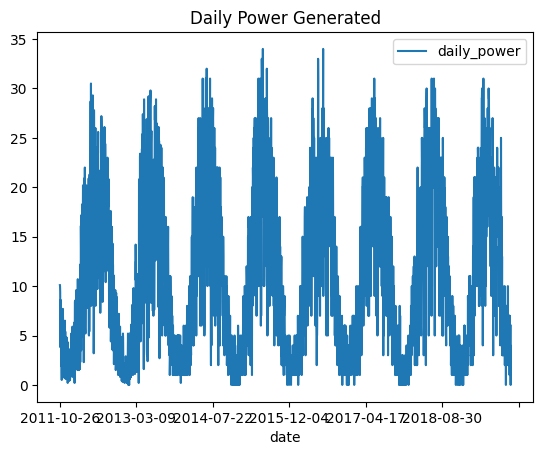

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
data.plot(x="date", y="daily_power")
plt.title('Daily Power Generated')
plt.show()

## Daily Power Generated (2017-2019)

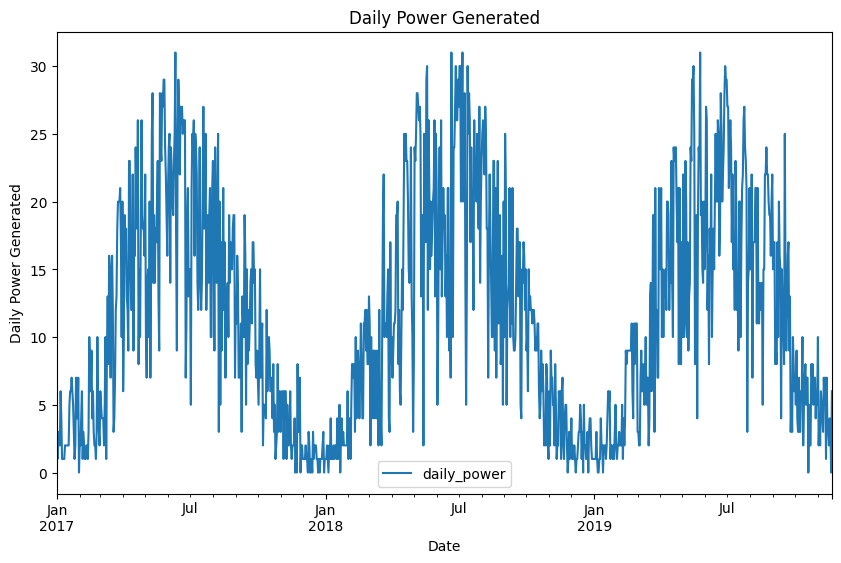

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and it already contains 'date' and 'daily_power' columns
# First, convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the years 2017 to 2019
data = data[(data['date'].dt.year >= 2017) & (data['date'].dt.year <= 2019)]

# Plotting
data.plot(x="date", y="daily_power", figsize=(10, 6))
plt.title('Daily Power Generated')
plt.xlabel('Date')
plt.ylabel('Daily Power Generated')
plt.show()


# Preprocessing weather data

In [18]:
from load_weather_data import load_weather_data
from preprocess_data import preprocess_weather

# Load data:
weather_data = load_weather_data('data_bucket_raw', 'weather_data.csv')

# Preprocessing to join the data frames into one and do some cleaning
data = preprocess_weather('data_bucket_raw', 'weather_data.csv')

print(data)

File ./data/temp.csv uploaded to weather_data.csv.
            date  tavg  tmin  tmax
0     2017-01-01  -1.3  -3.3   0.2
1     2017-01-02   2.4   0.3   7.0
2     2017-01-03   3.0   0.5   4.6
3     2017-01-04   5.7   4.5   7.5
4     2017-01-05   2.4  -3.1   5.1
...          ...   ...   ...   ...
1090  2019-12-27   6.5   5.1   8.0
1091  2019-12-28   3.1   0.1   5.7
1092  2019-12-29   0.7  -2.2   5.5
1093  2019-12-30   5.5   2.7   9.5
1094  2019-12-31   3.9   1.7   6.1

[1095 rows x 4 columns]


Dropped all the columns that are always NaN and kept only the temperature columns

# Merging energy and weather data

In [19]:
# data = weather_data.merge(energy_data, on="date")

from load_energy_data import load_energy_data_from_csv
from load_weather_data import load_weather_data
from preprocess_data import preprocess_data

# Load data:
weather_data = load_weather_data('data_bucket_raw', 'weather_data.csv')
energy_data = load_energy_data_from_csv()

# Preprocessing to join the data frames into one and do some cleaning
data = preprocess_data('data_bucket_raw','weather_data', 'energy_data')

print(data)

File ./data/temp.csv uploaded to weather_data.csv.
            date  tavg  tmin  tmax  daily_power
0     2017-01-01  -1.3  -3.3   0.2          2.0
1     2017-01-02   2.4   0.3   7.0          1.0
2     2017-01-03   3.0   0.5   4.6          3.0
3     2017-01-04   5.7   4.5   7.5          2.0
4     2017-01-05   2.4  -3.1   5.1          2.0
...          ...   ...   ...   ...          ...
1049  2019-11-16   3.7  -0.7   7.6          2.0
1050  2019-11-17   4.1  -1.7   8.5          4.0
1051  2019-11-18   6.1   4.5   8.7          3.0
1052  2019-11-19   5.3  -0.4   8.2          0.0
1053  2019-11-20   0.9  -3.0   6.2          6.0

[1049 rows x 5 columns]


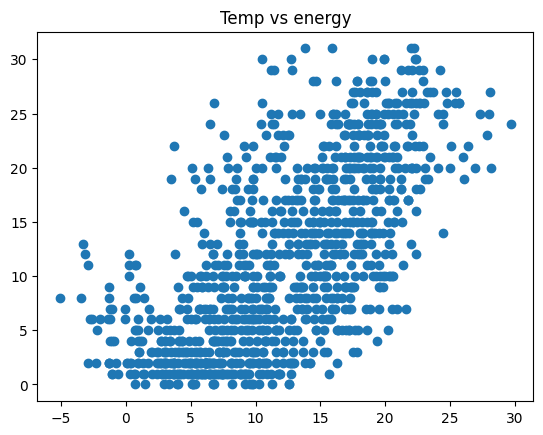

In [20]:
import matplotlib.pyplot as plt
plt.plot(data.tavg, data.daily_power, 'o')
plt.title('Temp vs energy')
plt.show()

# Average Temperature and Daily Power Generated over Time

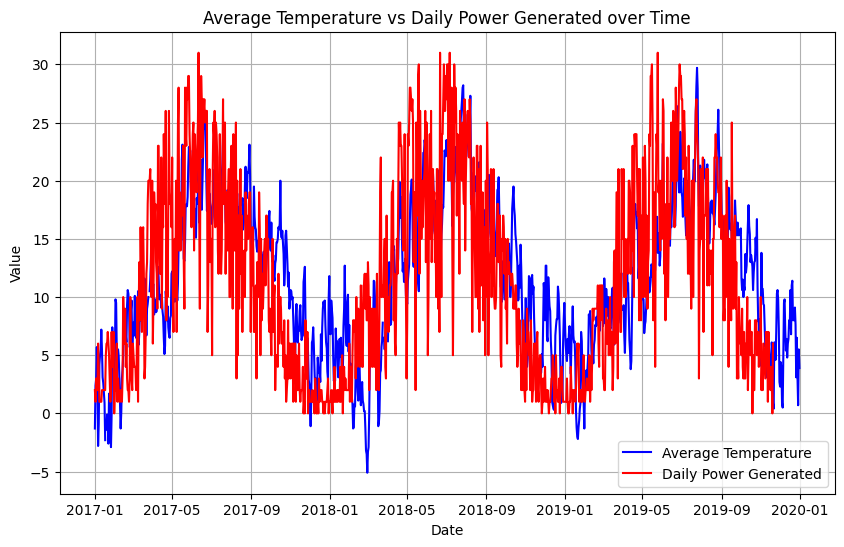

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'weather_data' and 'data' are your DataFrames and they already contain 'date', 'tavg', and 'daily_power' columns
# First, convert 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])
data['date'] = pd.to_datetime(data['date'])

# Filter the data for the years 2017 to 2019
weather_data = weather_data[(weather_data['date'].dt.year >= 2017) & (weather_data['date'].dt.year <= 2019)]
data = data[(data['date'].dt.year >= 2017) & (data['date'].dt.year <= 2019)]

# Plotting both lines on the same axes
plt.figure(figsize=(10, 6))

# Plot average temperature over time
plt.plot(weather_data['date'], weather_data['tavg'], label='Average Temperature', color='blue')

# Plot daily power generated
plt.plot(data['date'], data['daily_power'], label='Daily Power Generated', color='red')

plt.title('Average Temperature vs Daily Power Generated over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
from helper_functions import query_weather_from_api
from helper_functions import get_train_test_data
from load_energy_data import load_energy_data_from_csv
from load_weather_data import load_weather_data
from preprocess_data import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load data:
weather_data = load_weather_data('data_bucket_raw', 'weather_data.csv')
energy_data = load_energy_data_from_csv()

# Preprocessing to join the data frames into one and do some cleaning
data = preprocess_data('data_bucket_raw','weather_data', 'energy_data')
print(data)

File ./data/temp.csv uploaded to weather_data.csv.
            date  tavg  tmin  tmax  daily_power
0     2017-01-01  -1.3  -3.3   0.2          2.0
1     2017-01-02   2.4   0.3   7.0          1.0
2     2017-01-03   3.0   0.5   4.6          3.0
3     2017-01-04   5.7   4.5   7.5          2.0
4     2017-01-05   2.4  -3.1   5.1          2.0
...          ...   ...   ...   ...          ...
1049  2019-11-16   3.7  -0.7   7.6          2.0
1050  2019-11-17   4.1  -1.7   8.5          4.0
1051  2019-11-18   6.1   4.5   8.7          3.0
1052  2019-11-19   5.3  -0.4   8.2          0.0
1053  2019-11-20   0.9  -3.0   6.2          6.0

[1049 rows x 5 columns]


# Fitting a model to the data

In [40]:
# Split into train and test data
X_train, y_train, X_test, y_test = get_train_test_data(data)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict solar energy for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.987006291459413


# Downloading new data (future weather forecast) and predicting on that with our model

In [44]:
future_data = query_weather_from_api("Antwerp", 3, False)
future_data = preprocess_api_forecast_data(future_data, 'processed_forecast_data.csv')
print(future_data)
print(model.predict(future_data[["tavg", "tmin", "tmax"]]))

   tmax  tmin  tavg        date
0  10.9   2.8   5.9  2024-02-08
1  12.6   9.3  10.8  2024-02-09
2  10.3   7.9   9.1  2024-02-10
[[7.8382755 ]
 [7.3265784 ]
 [5.51669123]]


# Time Series Plots - Actual vs. Predicted Power

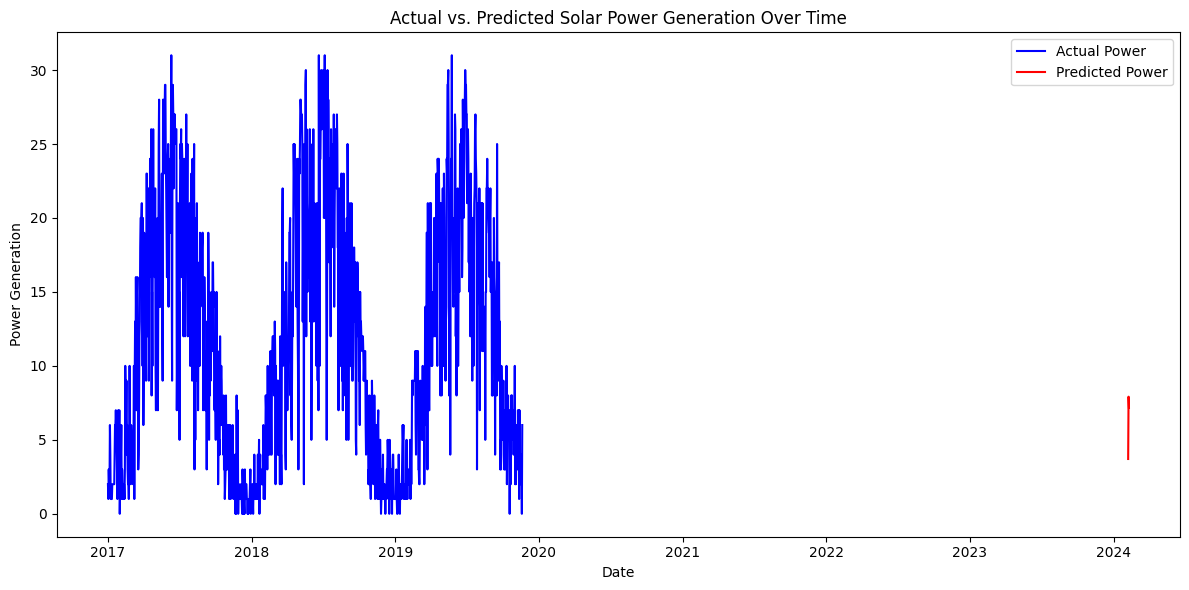

In [26]:
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy

# Make predictions for the next three days and store them in a separate DataFrame
future_data = query_weather_from_api("Antwerp", 3, False)
future_data = preprocess_api_forecast_data(future_data, 'processed_forecast_data.csv')
predictions = model.predict(future_data[["tavg", "tmin", "tmax"]])

# Convert 'predictions' to a 1-dimensional array using reshape
predictions = predictions.reshape(-1)

# Create a DataFrame for the predictions
predicted_data = pd.DataFrame({'date': future_data['date'], 'predicted_power': predictions})

# Concatenate historical data with predicted data
data_and_predictions = pd.concat([data, predicted_data])

# Convert the 'date' column to datetime type
data_and_predictions['date'] = pd.to_datetime(data_and_predictions['date'])

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(data_and_predictions['date'], data_and_predictions['daily_power'], label='Actual Power', color='blue')
plt.plot(data_and_predictions['date'], data_and_predictions['predicted_power'], label='Predicted Power', color='red')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Power Generation')
plt.title('Actual vs. Predicted Solar Power Generation Over Time')
plt.legend()

# Show the plot or save it to a file
plt.tight_layout()
plt.show()


# Error Distribution Plot

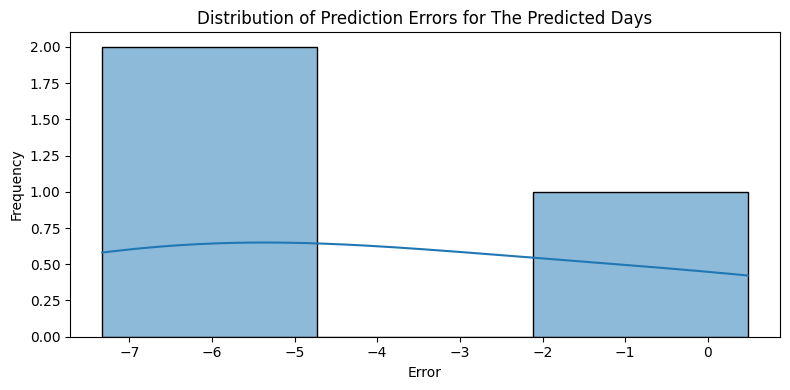

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions for the next three days and store them in a separate DataFrame
future_data = query_weather_from_api("Antwerp", 3, False)
future_data = preprocess_api_forecast_data(future_data, 'processed_forecast_data.csv')
predictions = model.predict(future_data[["tavg", "tmin", "tmax"]])

# Flatten the predictions to create a 1D array
predictions_flat = predictions.flatten()

# Calculate errors for the next three days only
errors = data['daily_power'][-3:] - predictions_flat

# Plot error distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=errors, kde=True)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors for The Predicted Days')
plt.tight_layout()
plt.show()


# Scatter Plot - Predicted vs. Actual Power:

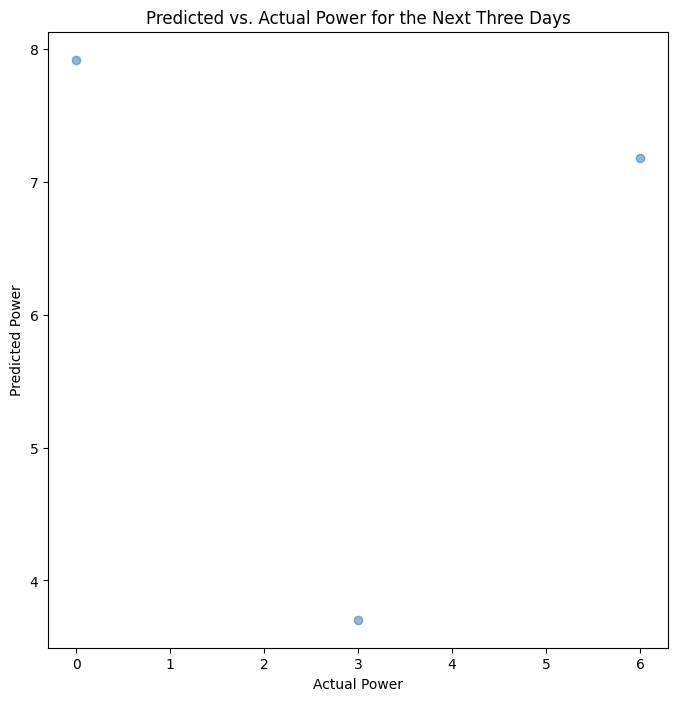

In [28]:
# Select the corresponding actual power values for the next three days
actual_power_next_three_days = data['daily_power'][-3:]

# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(actual_power_next_three_days, predictions_flat, alpha=0.5)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Predicted vs. Actual Power for the Next Three Days')
plt.show()


# Feature Importance Plot:

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a model object named 'model' and feature names
# Make sure to replace 'model' with your actual model object

# Check if the model has feature importances
if hasattr(model, 'feature_importances_'):
    # Convert feature names to a 1-dimensional list
    feature_names = list(X_train.columns)

    # Create a DataFrame with feature names and their corresponding importances
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})

    # Sort the DataFrame by importance values
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.title('Feature Importance')
    plt.xlabel('Importance Value')
    plt.ylabel('Features')
    plt.show()
else:
    print("This model does not have feature importances.")


This model does not have feature importances.


# Model Performance Metric Plot

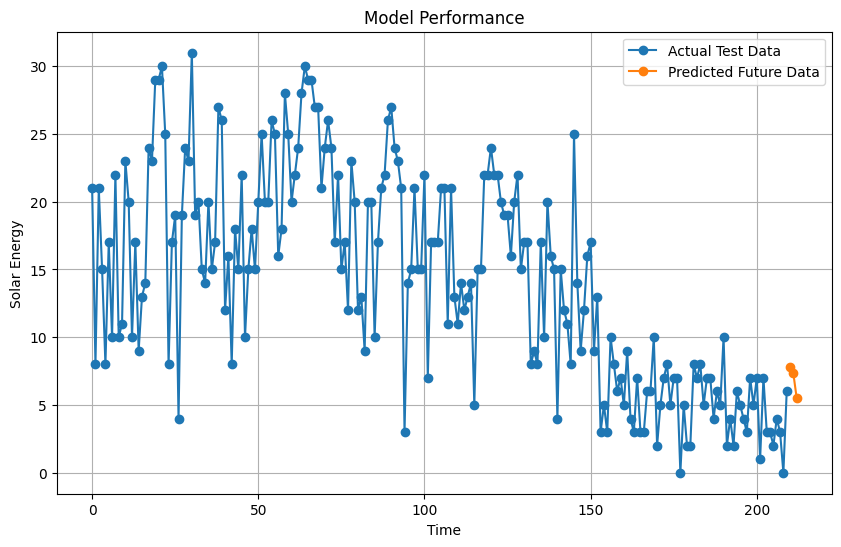

In [47]:
# Split into train and test data
X_train, y_train, X_test, y_test = get_train_test_data(data)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict solar energy for the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)

# Fetch and preprocess future forecast data
future_data = query_weather_from_api("Antwerp", 3, False)
future_data = preprocess_api_forecast_data(future_data, 'processed_forecast_data.csv')

# Predict solar energy for the future forecast data
y_pred_future = model.predict(future_data[["tavg", "tmin", "tmax"]])

# Calculate mean absolute error for future forecast data (replace this with your actual calculation)
# For example, if you have actual future solar energy data, you can calculate the mean absolute error
# between the predicted values (y_pred_future) and the actual values.
# For demonstration purposes, let's assume the mean absolute error for future forecast data:
mae_future = [7.8382755, 7.3265784, 5.51669123]  # Replace this with your actual mean absolute error values

# Now you can proceed with plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, marker='o', linestyle='-', label='Actual Test Data')
plt.plot(range(len(y_test), len(y_test) + len(y_pred_future)), y_pred_future, marker='o', linestyle='-', label='Predicted Future Data')
plt.xlabel('Time')
plt.ylabel('Solar Energy')
plt.title('Model Performance')
plt.legend()
plt.grid(True)
plt.show()


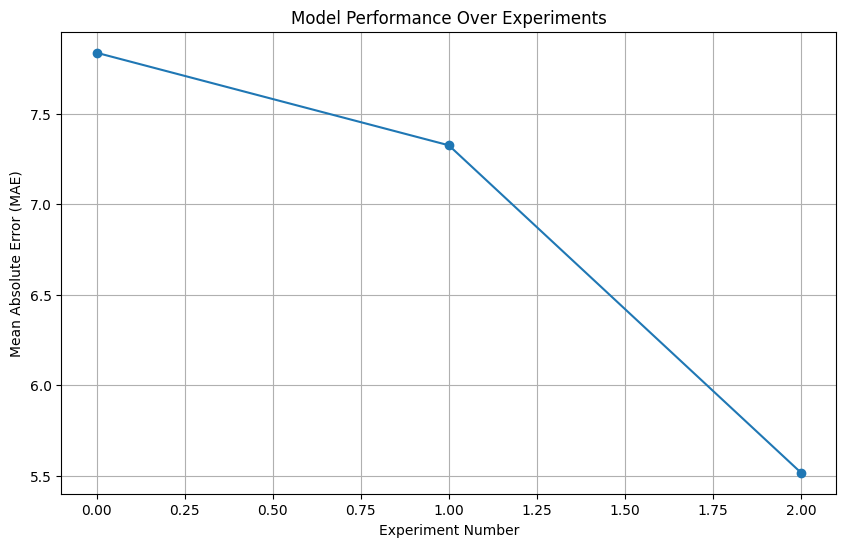

In [46]:

  #  Defining mae_values with some sample data 
mae_values = [7.8382755, 7.3265784, 5.51669123]

# Now you can proceed with plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(mae_values)), mae_values, marker='o', linestyle='-')
plt.xlabel('Experiment Number')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Performance Over Experiments')
plt.grid(True)
plt.show()


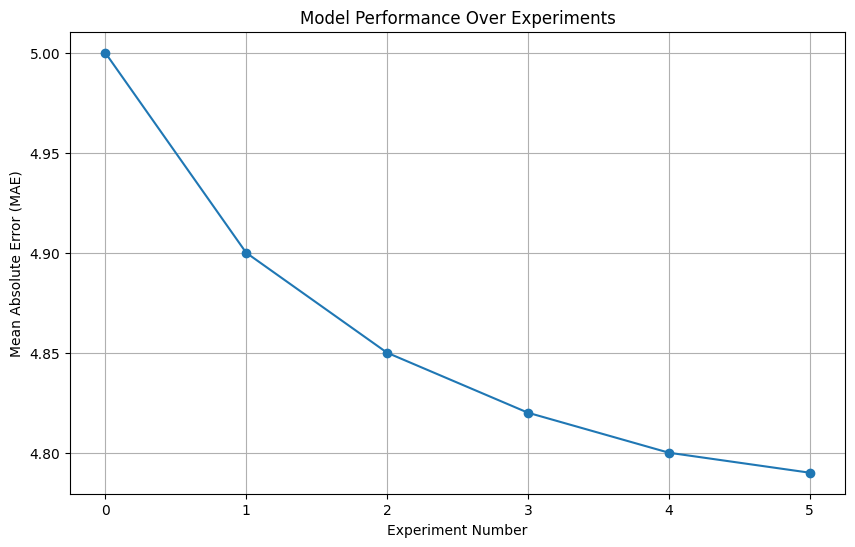

In [30]:
# Example: Defining mae_values with some sample data (replace this with your actual data)
mae_values = [5, 4.9, 4.85, 4.82, 4.8, 4.79]

# Now you can proceed with plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(mae_values)), mae_values, marker='o', linestyle='-')
plt.xlabel('Experiment Number')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Performance Over Experiments')
plt.grid(True)
plt.show()


# Forecast Plot

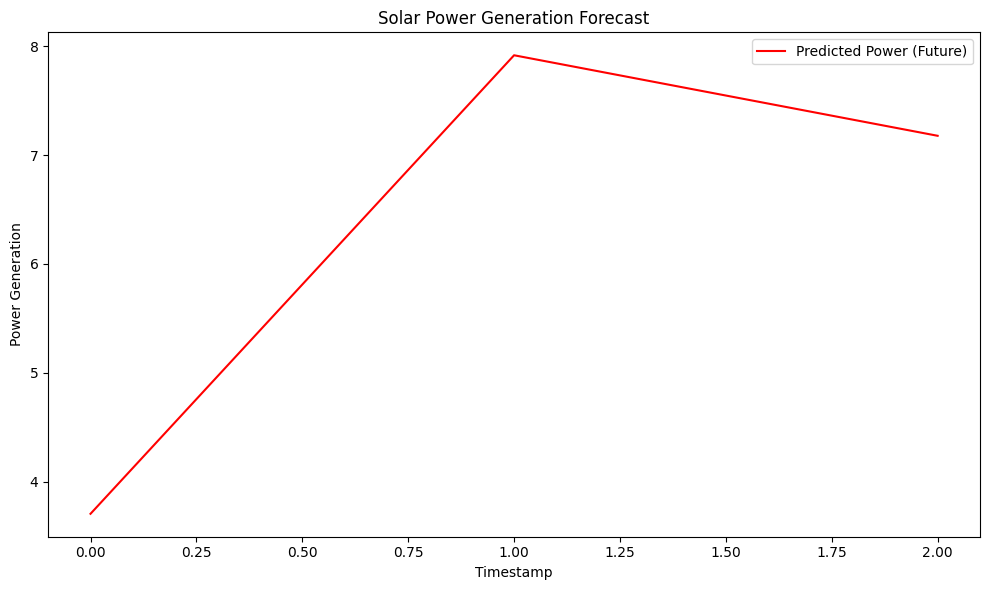

In [31]:
# Assuming 'future_data' contains the data for forecasting
forecast = model.predict(future_data[["tavg", "tmin", "tmax"]])
plt.figure(figsize=(10, 6))
plt.plot(future_data.index, forecast, label='Predicted Power (Future)', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Power Generation')
plt.title('Solar Power Generation Forecast')
plt.legend()
plt.tight_layout()
plt.show()


# Correlation Between Temperature Variations and Solar Power Output Predictions

Index(['tavg', 'tmin', 'tmax', 'daily_power'], dtype='object')


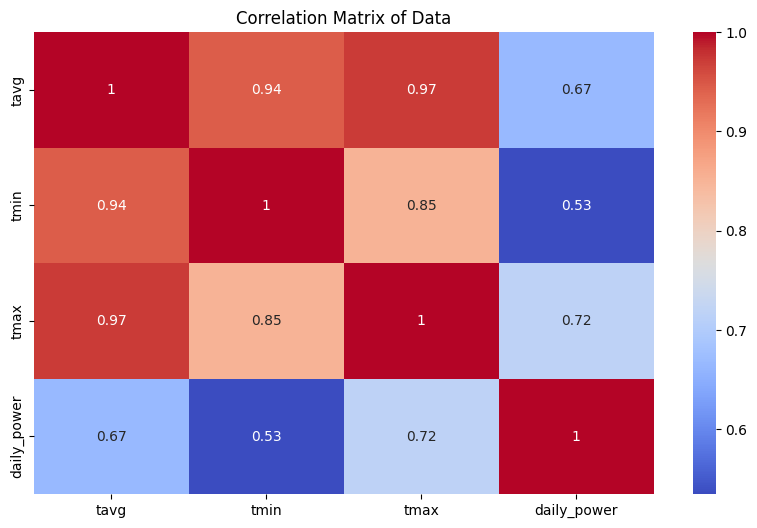

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import storage
import io

# Set the project ID
PROJECT_ID = "reflected-oath-405515"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "./terraform/reflected-oath-405515-70b04b6190ad.json"

# Define the function to download data from Google Cloud Storage
def download_from_gcs(bucket_name, blob_name):
    """Downloads a DataFrame from Google Cloud Storage."""
    credentials_path = os.environ.get("GOOGLE_APPLICATION_CREDENTIALS")
    client = storage.Client(project=PROJECT_ID)
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(blob_name)
    file_data = blob.download_as_text()
    return pd.read_csv(io.StringIO(file_data))

# Load the preprocessed data from your GCS bucket
data = download_from_gcs('data_bucket_processed', 'data.csv')

# Exclude the 'date' column from the correlation analysis
correlation_data = data.drop(columns=['date'])

# Verify the column names in the DataFrame
print(correlation_data.columns)

# Plot the correlation between available columns (excluding 'date')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Data')
plt.show()


# Scatter Plot Correlation Matrix

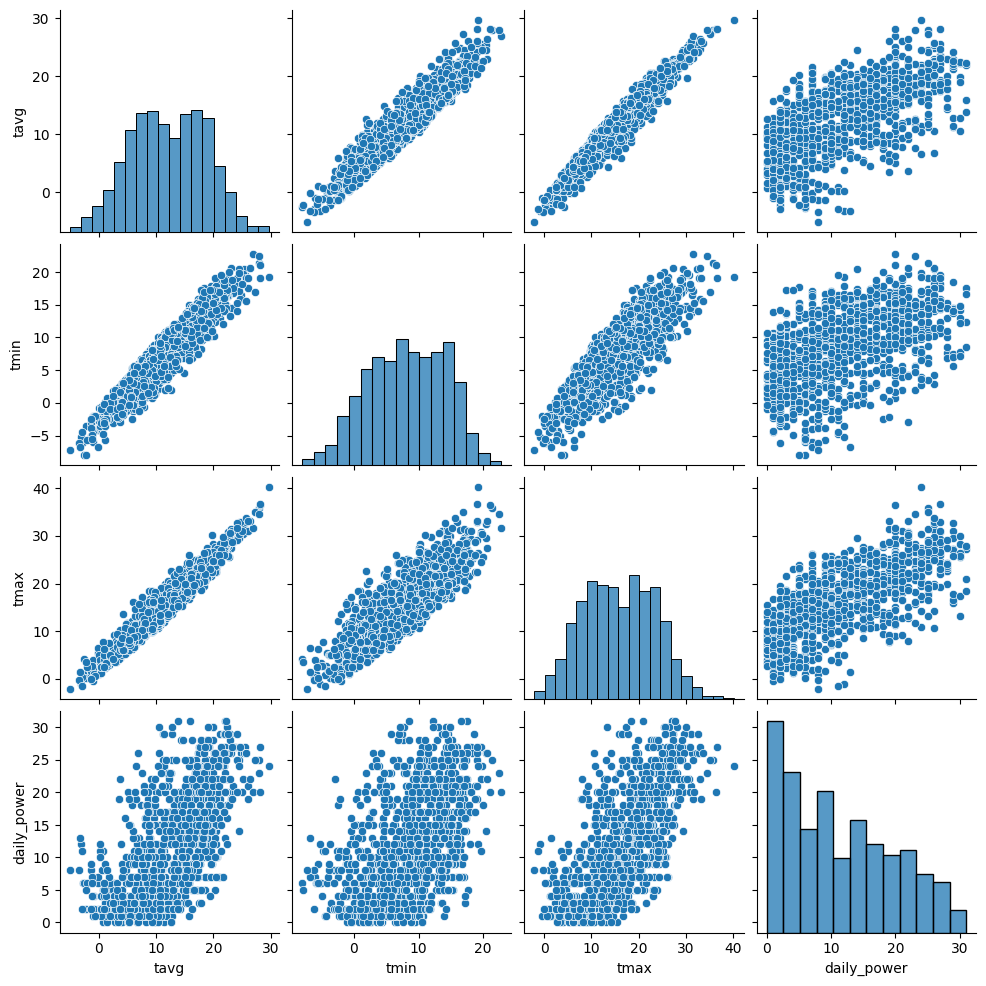

In [14]:
import os
import pandas as pd
import seaborn as sns
from google.cloud import storage
import io
import matplotlib.pyplot as plt

# Set the project ID
PROJECT_ID = "reflected-oath-405515"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "./terraform/reflected-oath-405515-70b04b6190ad.json"

# Define the function to download data from Google Cloud Storage
def download_from_gcs(bucket_name, blob_name):
    """Downloads a DataFrame from Google Cloud Storage."""
    credentials_path = os.environ.get("GOOGLE_APPLICATION_CREDENTIALS")
    client = storage.Client(project=PROJECT_ID)
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(blob_name)
    file_data = blob.download_as_text()
    return pd.read_csv(io.StringIO(file_data))

# Load the preprocessed data from your GCS bucket
data = download_from_gcs('data_bucket_processed', 'data.csv')

# Exclude the 'date' column from the analysis
correlation_data = data.drop(columns=['date'])

# Create a scatterplot matrix
sns.pairplot(correlation_data)
plt.show()


# Clustered Heatmap of Correlations

<Figure size 1000x600 with 0 Axes>

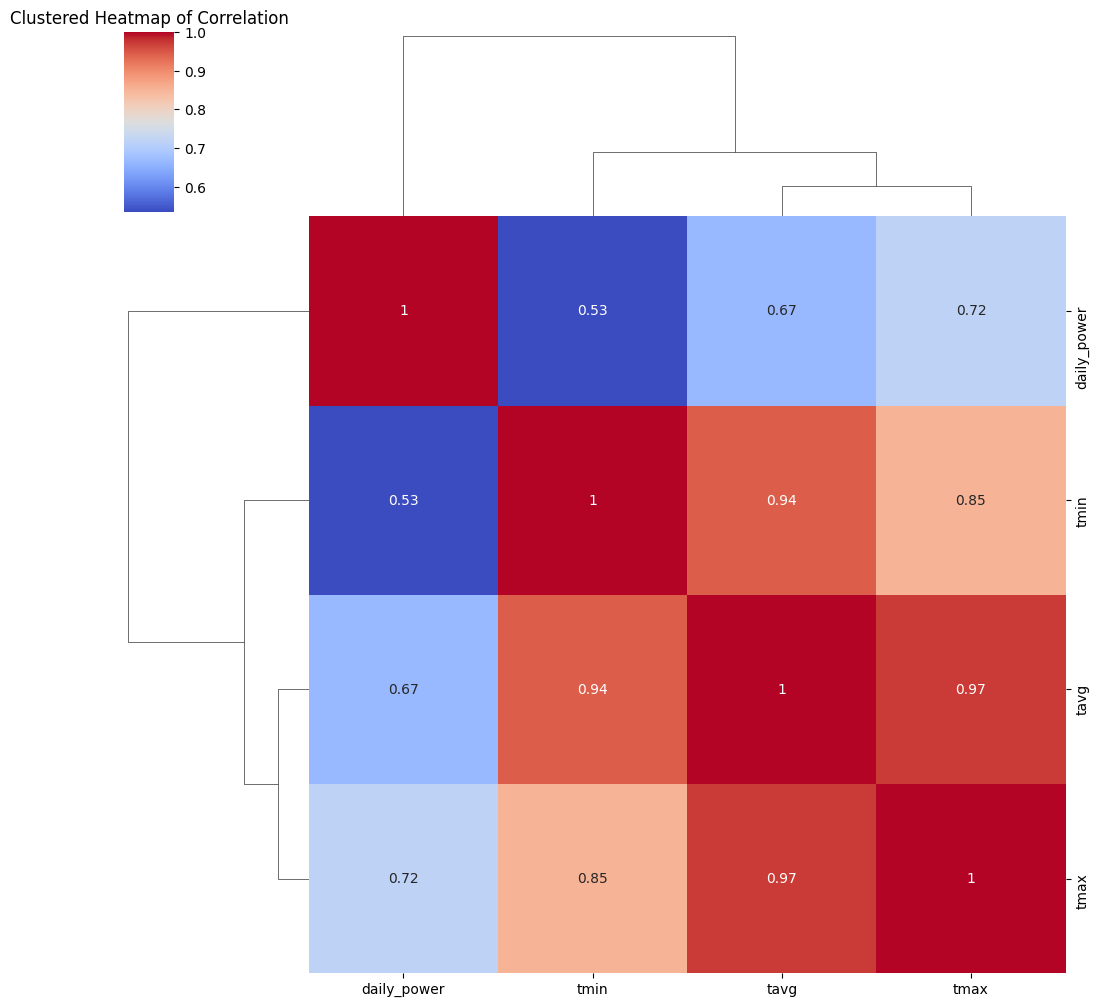

In [15]:
import os
import pandas as pd
import seaborn as sns
from google.cloud import storage
import io
import matplotlib.pyplot as plt

# Set the project ID
PROJECT_ID = "reflected-oath-405515"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "./terraform/reflected-oath-405515-70b04b6190ad.json"

# Define the function to download data from Google Cloud Storage
def download_from_gcs(bucket_name, blob_name):
    """Downloads a DataFrame from Google Cloud Storage."""
    credentials_path = os.environ.get("GOOGLE_APPLICATION_CREDENTIALS")
    client = storage.Client(project=PROJECT_ID)
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(blob_name)
    file_data = blob.download_as_text()
    return pd.read_csv(io.StringIO(file_data))

# Load the preprocessed data from your GCS bucket
data = download_from_gcs('data_bucket_processed', 'data.csv')

# Exclude the 'date' column from the analysis
correlation_data = data.drop(columns=['date'])

# Create a clustered heatmap
plt.figure(figsize=(10, 6))
sns.clustermap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title('Clustered Heatmap of Correlation')
plt.show()


# Heatmap of Prediction Errors

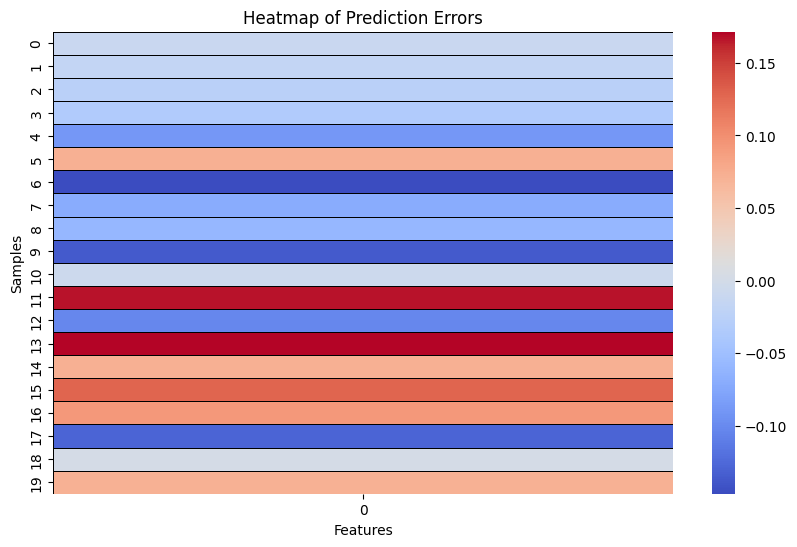

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# Calculate prediction errors
errors = y_test - y_pred

# Reshape errors to match the shape of X_test
errors = errors.reshape(X_test.shape[0], -1)

# Create a heatmap of prediction errors
plt.figure(figsize=(10, 6))
sns.heatmap(errors, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Heatmap of Prediction Errors')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()
